# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/my_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="

In [3]:
weather_data = pd.DataFrame({"City": cities})

In [4]:
weather_data['Latitude'] = ""
weather_data['Longitude'] = ""
weather_data['Max Temperature'] = ""
weather_data['Humidity'] = ""
weather_data['Cloudiness'] = ""
weather_data['Wind Speed'] = ""
weather_data['Country'] = ""
weather_data['Date'] = ""

In [5]:
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

city_counter = 1

for index, row in weather_data.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    city = row['City']
    response = requests.get(query_url + city).json()
  
    print(f"Processing Record {city_counter} of Set 1 | {city}")
    city_counter += 1    
    
    try:
        weather_data.loc[index, "Latitude"] = response['coord']['lat']
        weather_data.loc[index, "Longitude"] = response['coord']['lon']
        weather_data.loc[index, "Max Temperature"] = response['main']['temp_max']
        weather_data.loc[index, "Humidity"] = response['main']['humidity']
        weather_data.loc[index, "Cloudiness"] = response['clouds']['all']
        weather_data.loc[index, "Wind Speed"] = response['wind']['speed']
        weather_data.loc[index, "Country"] = response['sys']['country']
        weather_data.loc[index, "Date"] = response['dt']
                
    except (KeyError, IndexError): 
        print("City not found. Skipping....")
        
print(f"-----------------------------")
print(f"Data Retrieval Complete")      
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kruisfontein
Processing Record 2 of Set 1 | tshikapa
Processing Record 3 of Set 1 | airai
Processing Record 4 of Set 1 | souillac
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | manyana
Processing Record 8 of Set 1 | kokoda
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | aklavik
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | samusu
City not found. Skipping....
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | bull savanna
Processing Record 21 of Set 1 | norman wells
Processing Record 22 of Set 1 | butaritari
Processing Record 23 of S

Processing Record 187 of Set 1 | xai-xai
Processing Record 188 of Set 1 | port lincoln
Processing Record 189 of Set 1 | kahului
Processing Record 190 of Set 1 | dingle
Processing Record 191 of Set 1 | greenfield
Processing Record 192 of Set 1 | lexington
Processing Record 193 of Set 1 | bunbury
Processing Record 194 of Set 1 | aflu
City not found. Skipping....
Processing Record 195 of Set 1 | helong
Processing Record 196 of Set 1 | ancud
Processing Record 197 of Set 1 | karaul
City not found. Skipping....
Processing Record 198 of Set 1 | victoria
Processing Record 199 of Set 1 | gazanjyk
Processing Record 200 of Set 1 | grand gaube
Processing Record 201 of Set 1 | maumere
Processing Record 202 of Set 1 | bilibino
Processing Record 203 of Set 1 | zhireken
Processing Record 204 of Set 1 | fortuna
Processing Record 205 of Set 1 | koslan
Processing Record 206 of Set 1 | lorengau
Processing Record 207 of Set 1 | poum
Processing Record 208 of Set 1 | maldonado
Processing Record 209 of Set 1 

Processing Record 371 of Set 1 | cam ranh
Processing Record 372 of Set 1 | smidovich
Processing Record 373 of Set 1 | rocha
Processing Record 374 of Set 1 | cockburn harbour
City not found. Skipping....
Processing Record 375 of Set 1 | sopron
Processing Record 376 of Set 1 | mizoch
Processing Record 377 of Set 1 | noumea
Processing Record 378 of Set 1 | sulangan
Processing Record 379 of Set 1 | saryshagan
City not found. Skipping....
Processing Record 380 of Set 1 | dwarka
Processing Record 381 of Set 1 | bolungarvik
City not found. Skipping....
Processing Record 382 of Set 1 | abay
Processing Record 383 of Set 1 | tiradentes
Processing Record 384 of Set 1 | tiznit
Processing Record 385 of Set 1 | libertador general san martin
Processing Record 386 of Set 1 | pochutla
Processing Record 387 of Set 1 | niono
Processing Record 388 of Set 1 | touros
Processing Record 389 of Set 1 | ostrovnoy
Processing Record 390 of Set 1 | hofn
Processing Record 391 of Set 1 | comodoro rivadavia
Processin

Processing Record 558 of Set 1 | lodja
Processing Record 559 of Set 1 | prestea
Processing Record 560 of Set 1 | fort nelson
Processing Record 561 of Set 1 | ankang
Processing Record 562 of Set 1 | rancho palos verdes
Processing Record 563 of Set 1 | kolyvan
Processing Record 564 of Set 1 | namangan
Processing Record 565 of Set 1 | eureka
Processing Record 566 of Set 1 | jiaojiang
Processing Record 567 of Set 1 | botro
Processing Record 568 of Set 1 | taoudenni
Processing Record 569 of Set 1 | marsh harbour
Processing Record 570 of Set 1 | kargala
Processing Record 571 of Set 1 | dinguiraye
Processing Record 572 of Set 1 | tucumcari
Processing Record 573 of Set 1 | tumannyy
City not found. Skipping....
Processing Record 574 of Set 1 | mys shmidta
City not found. Skipping....
Processing Record 575 of Set 1 | narasapur
Processing Record 576 of Set 1 | mezen
Processing Record 577 of Set 1 | isilkul
Processing Record 578 of Set 1 | shitanjing
Processing Record 579 of Set 1 | florianopolis


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
compression_opts = dict(method='zip',
                        archive_name='my_cities.csv')  
weather_data.to_csv('my_cities.zip', index=False,
          compression=compression_opts)  

In [7]:
weather_data.count()

City               611
Latitude           611
Longitude          611
Max Temperature    611
Humidity           611
Cloudiness         611
Wind Speed         611
Country            611
Date               611
dtype: int64

In [8]:
weather_data

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,kruisfontein,-34,24.73,77.74,18,0,14.7,ZA,1595330626
1,tshikapa,-6.42,20.8,97.52,13,0,3.69,CD,1595330626
2,airai,-8.93,125.41,56.77,100,27,3.42,TL,1595330626
3,souillac,-20.52,57.52,73.4,49,75,13.87,MU,1595330626
4,bengkulu,-3.8,102.27,81.93,80,100,6.38,ID,1595330349
...,...,...,...,...,...,...,...,...,...
606,pyaozerskiy,65.83,31.17,77.23,43,60,7.92,RU,1595330744
607,voyinka,45.87,33.99,86.27,38,7,11.63,UA,1595330744
608,wladyslawowo,54.79,18.4,69.01,48,20,19.46,PL,1595330744
609,hokitika,-42.72,170.97,47.93,87,95,5.28,NZ,1595330745


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
weather_data_humidity = weather_data.loc[weather_data["Humidity"] > 100]
weather_data_humidity

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
#already exported above

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [12]:
weather_data.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,kruisfontein,-34,24.73,77.74,18,0,14.7,ZA,1595330626
1,tshikapa,-6.42,20.8,97.52,13,0,3.69,CD,1595330626
2,airai,-8.93,125.41,56.77,100,27,3.42,TL,1595330626
3,souillac,-20.52,57.52,73.4,49,75,13.87,MU,1595330626
4,bengkulu,-3.8,102.27,81.93,80,100,6.38,ID,1595330349


In [13]:
weather_data.dtypes

City               object
Latitude           object
Longitude          object
Max Temperature    object
Humidity           object
Cloudiness         object
Wind Speed         object
Country            object
Date               object
dtype: object

In [14]:
weather_data["Latitude"] = pd.to_numeric(weather_data["Latitude"], errors='coerce')
weather_data["Max Temperature"] = pd.to_numeric(weather_data["Max Temperature"], errors='coerce')
weather_data["Humidity"] = pd.to_numeric(weather_data["Humidity"], errors='coerce')
weather_data["Cloudiness"] = pd.to_numeric(weather_data["Cloudiness"], errors='coerce')
weather_data["Wind Speed"] = pd.to_numeric(weather_data["Wind Speed"], errors='coerce')

## Latitude vs. Temperature Plot

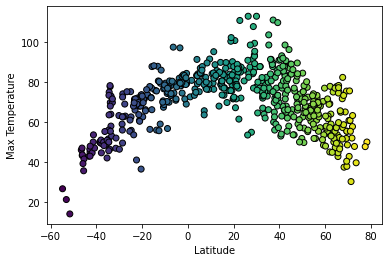

In [16]:
scatter_one = plt.figure()
x_values = weather_data['Latitude']
y_values = weather_data['Max Temperature']
t = x_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.title = ("City Latitude vs Max Temperature (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

In [ ]:
#Observation
#PNG image for each scatter plot.

## Latitude vs. Humidity Plot

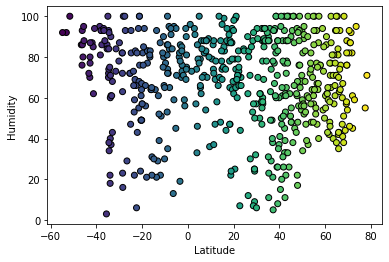

In [17]:
scatter_two = plt.figure()
x_values = weather_data['Latitude']
y_values = weather_data['Humidity']
t = x_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.title = ("City Latitude vs Humidity (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

In [ ]:
#Observation
#PNG image for each scatter plot.

## Latitude vs. Cloudiness Plot

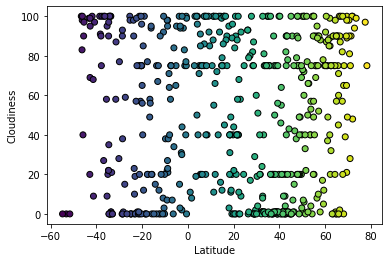

In [18]:
scatter_three = plt.figure()
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness']
t = x_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.title = ("City Latitude vs Cloudiness (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

In [ ]:
#Observation
#PNG image for each scatter plot.

## Latitude vs. Wind Speed Plot

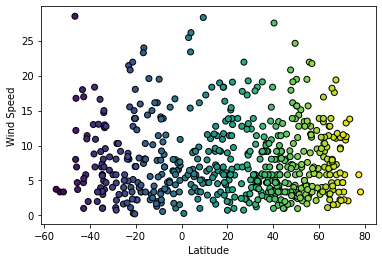

In [19]:
scatter_four = plt.figure()
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed']
t = x_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.title = ("City Latitude vs Wind Speed (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

In [ ]:
#Observation
#PNG image for each scatter plot.

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
#Observations
#PNG image for each scatter plot

In [20]:
northern_hemisphere = weather_data.loc[(weather_data["Latitude"] >= 0)]
northern_hemisphere

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
5,nikolskoye,59.70,30.79,77.00,50.0,75.0,6.71,RU,1595330627
8,hilo,19.73,-155.09,71.60,68.0,40.0,5.82,US,1595330627
9,aklavik,68.22,-135.01,37.40,100.0,75.0,4.70,CA,1595330627
11,kapaa,22.08,-159.32,77.00,83.0,40.0,13.87,US,1595330627
14,tuktoyaktuk,69.45,-133.04,37.83,88.0,100.0,9.66,CA,1595330628
...,...,...,...,...,...,...,...,...,...
605,anupgarh,29.19,73.21,95.45,50.0,29.0,13.13,IN,1595330743
606,pyaozerskiy,65.83,31.17,77.23,43.0,60.0,7.92,RU,1595330744
607,voyinka,45.87,33.99,86.27,38.0,7.0,11.63,UA,1595330744
608,wladyslawowo,54.79,18.4,69.01,48.0,20.0,19.46,PL,1595330744


In [21]:
southern_hemisphere = weather_data.loc[(weather_data["Latitude"] < 0)]
southern_hemisphere

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,kruisfontein,-34.00,24.73,77.74,18.0,0.0,14.70,ZA,1595330626
1,tshikapa,-6.42,20.8,97.52,13.0,0.0,3.69,CD,1595330626
2,airai,-8.93,125.41,56.77,100.0,27.0,3.42,TL,1595330626
3,souillac,-20.52,57.52,73.40,49.0,75.0,13.87,MU,1595330626
4,bengkulu,-3.80,102.27,81.93,80.0,100.0,6.38,ID,1595330349
...,...,...,...,...,...,...,...,...,...
590,cruz alta,-28.64,-53.61,62.60,72.0,93.0,5.82,BR,1595330460
593,nabire,-3.37,135.48,79.47,78.0,95.0,1.74,ID,1595330741
599,san rafael,-34.62,-68.33,45.63,84.0,97.0,5.68,AR,1595330742
600,uyuni,-20.46,-66.83,36.45,61.0,100.0,0.22,BO,1595330743


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

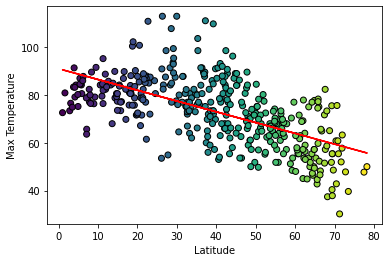

In [22]:
scatter_five = plt.figure()
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
t = x_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.title = ("City Latitude vs Max Temperature: Northern Hemisphere (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

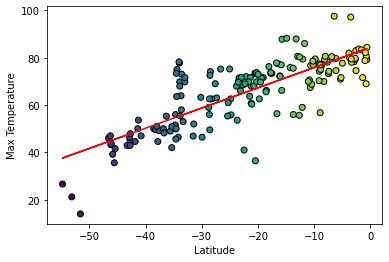

In [23]:
scatter_six = plt.figure()
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
t = x_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.title = ("City Latitude vs Max Temperature: Northern Hemisphere (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

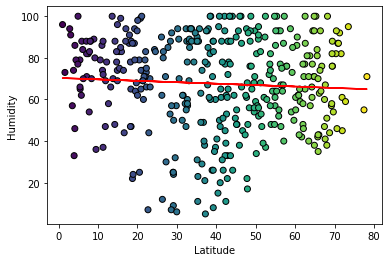

In [24]:
scatter_seven = plt.figure()
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
t = x_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.title = ("City Latitude vs Humidity: Northern Hemisphere (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

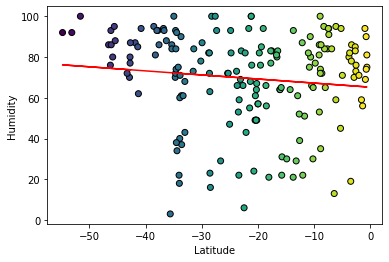

In [25]:
scatter_eight = plt.figure()
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
t = x_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.title = ("City Latitude vs Humidity: Northern Hemisphere (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

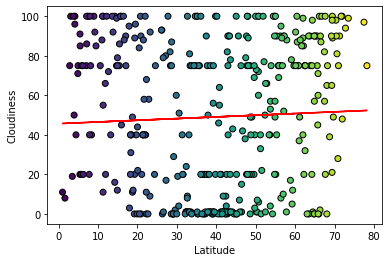

In [26]:
scatter_nine = plt.figure()
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
t = x_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.title = ("City Latitude vs Cloudiness: Northern Hemisphere (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

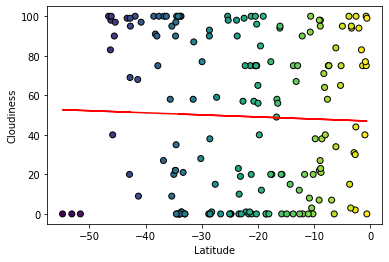

In [27]:
scatter_ten = plt.figure()
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
t = x_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.title = ("City Latitude vs Cloudiness: Northern Hemisphere (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

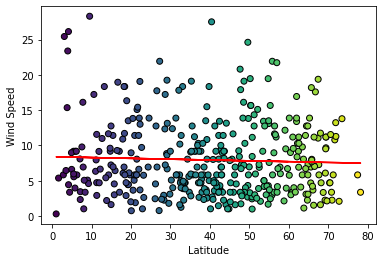

In [28]:
scatter_eleven = plt.figure()
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
t = x_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.title = ("City Latitude vs Wind Speed: Northern Hemisphere (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

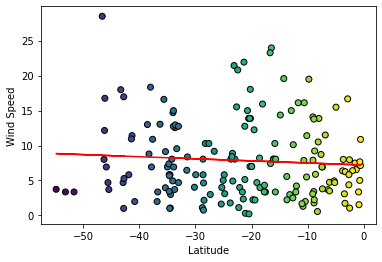

In [29]:
scatter_twelve = plt.figure()
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
t = x_values
plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
plt.plot(x_values,regress_values,"r-") 
plt.title = ("City Latitude vs Wind Speed: Northern Hemisphere (7/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()